# Project 3 - Tazmanian Water Wells
_________________________________________________________

## Business Understanding
This notebook is a categorical study of water wells in Tazmania for a non-profit organization to determine which wells need maintenance or are defunct and require new wells entirely. The goal of this project is to predict with as much accuracy as possible which water wells in the Republic of Tasmania require maintenence or new waterwells built. 

### Data Overview
Data was congregated by [Driven Data](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/23/) from [Taarifa](https://taarifa.org/) and the Republic of Tazmania's [Ministry of Water](https://www.maji.go.tz/) for the purpose of predicting which water wells are faulty. Predictions will be made based of data regarding the type of pumps, time since it was installed and how it has been managed since. The main goal of this project is to provide suggestions to a nonprofit to fund  maintanence on pumps that could fail to save the cost of building new wells as a result of defunct water wells to continue to provide vital, potable clean water to the local populace. 

## Data Preparation
Data Cleaning and Preperation
Some categories of data have mispelled data values, and decided how to best deal with missing data explored through graphs, grouping, and descriptive statistics. \
The purpose of this Data preparation is to prepare the data for further modeling.

In [38]:
#Imported necessary libraries for data cleaning
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split

In [39]:
#Loaded in data sets and set to dataframes
df_test_set = pd.read_csv('data/test-set-values.csv')
df_train_set = pd.read_csv('data/training-test-values.csv')
df_train_labels = pd.read_csv('data/training-set-labels.csv')

In [40]:
df_test_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe


In [41]:
df_train_labels

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [42]:
df_train_set

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump


After a cursory look at the data we will leave the test data for now and combine the test data set and label on the shared id column

In [43]:
df = pd.merge(df_train_set, df_train_labels, how='inner', on='id')
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [44]:
df.head(25)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322e+00,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466e+00,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329e+00,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-1.115530e+01,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359e+00,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587e+00,Tajiri,0,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365e+00,Kwa Ngomho,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198e+00,Tushirikiane,0,...,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712e+00,Kwa Ramadhan Musa,0,...,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051e+00,Kwapeto,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

There are 40 different columns of data outside of the index ID, some of which appear to be reductive and can be dropped after further exploration. There are also 59400 rows of data. We will next check for missing data and decide how to best deal with it

In [46]:
df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [47]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


From the different categories and their data types the most useful categories appear to be construction_year, management_group, water_quality, installer, and status_group. 

In [48]:
df['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

There are a surprising amount of non functional water wells. This is our target group to predict which if a well falls into one of these three categories based off the aformentioned variables. 

In [49]:
print(df['construction_year'].value_counts().sort_values)

<bound method Series.sort_values of 0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64>


In [50]:
print(df['construction_year'].value_counts())

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64


To make the construction data easier to interpret created new column for which decade each was built. Since the vast majority of wells were built in the 2000's we could use it to fill in our missing data but we'll leave it alone for now. 

In [51]:
df['construction_decade'] = (df['construction_year']//10) * 10
df['construction_decade'].value_counts()

0       20709
2000    15330
1990     7678
1980     5578
2010     5161
1970     4406
1960      538
Name: construction_decade, dtype: int64

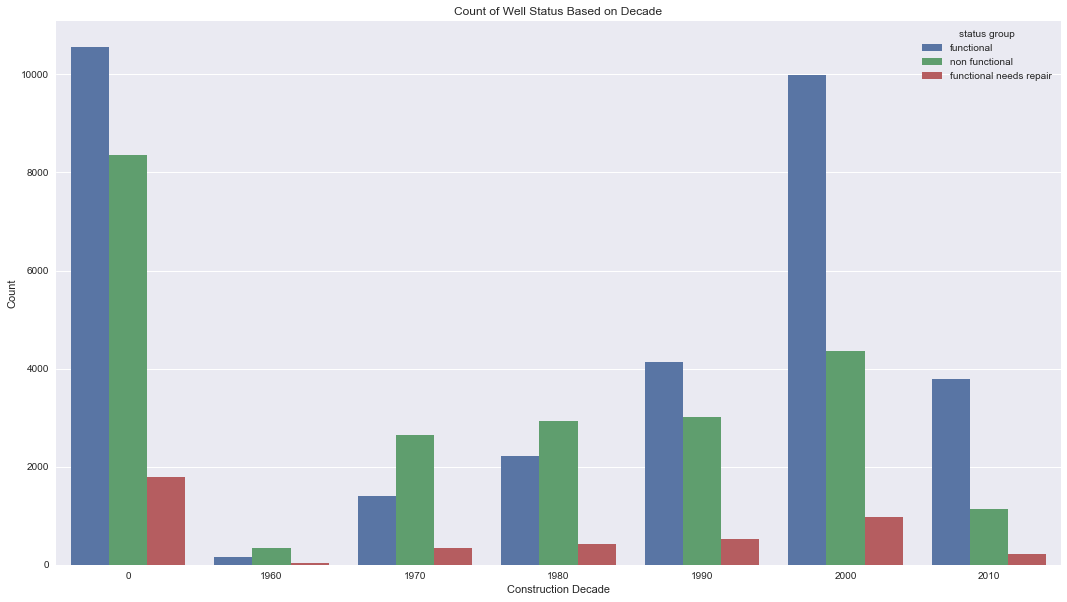

In [52]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x='construction_decade', hue='status_group', data=df)
plt.title('Count of Well Status Based on Decade')
plt.xlabel('Construction Decade')
plt.ylabel('Count')
plt.legend(title='status group')

It does appear just from the graph that the older the well the greater liklihood it is non-functioning. Which logically seems to make sense. 

In [53]:
df['installer'].describe()

count     55745
unique     2145
top         DWE
freq      17402
Name: installer, dtype: object

In [54]:
df['installer'].value_counts().head(100).sum()

43663

In [63]:
df_installer = df['installer']
with pd.option_context('display.max_rows', 100):
    print(df['installer'].value_counts().head(100))

DWE                              18357
Government                        3687
Community                         1613
DANIDA                            1602
Hesawa                            1379
RWE                               1206
KKKT                               898
World vision                       799
0                                  777
TCRS                               707
CES                                610
Fini Water                         593
District Council                   551
AMREF                              443
LGA                                408
WEDECO                             397
TASAF                              396
DMDD                               376
RC Church                          374
Norad                              360
Jaica                              352
Unicef                             332
OXFAM                              330
TWESA                              316
WU                                 301
ACRA                     

There are several values that are the same thing but written slightly differently such as, Government, Central government, Central govt, Gover etc. Combining like categories. 

In [81]:
replacement_dict = {
    'DWE': ['District water department', 'District water depar', 'Distric Water Department', 'District council', 'Distri', 'DW'],
    'Government': ['Central government', 'Central govt', 'Centr', 'Central Government', 'Gover', 'Gove', 'GOVER', 'Go', 'GOVERNMENT'],
    'Community': ['Commu', 'Community'],
    'DANIDA': ['DANIDA', 'DANID'],
    'RC Church': ['RC', 'RC CHURCH'],
    'Hesawa': ['HESAWA', 'Hesawa'],
    'World vision': ['World vision', 'World Vision', 'World'],
    'Unicef': ['UNICEF', 'Unisef'],
    'Jaica': ['JAICA', 'Jaica', 'JICA'],
    'Fini Water': ['FinW', 'Fini water', 'FINI WATER'],
    'villagers': ['Villagers', 'Village Council'],
    'AMREF': ['AMREF', 'Amref'],
    'OXFAM': ['OXFAM', 'OXFARM'],
    'Norad': ['NORAD', 'Norad'],
    'DMDD': ['Dmdd', 'DMDD'],
    'TCRS': ['TCRS'],
    'WEDECO': ['WEDECO'],
    'TASAF': ['TASAF'],
    'ACRA': ['ACRA'],
    'TWESA': ['TWESA'],
    'Sengerema Water Department': ['Sengerema Water Department'],
    'Kiliwater': ['Kiliwater'],
    'RWSSP': ['RWSSP'],
    'SHIPO': ['SHIPO', 'Shipo'],
    'Consulting Engineer': ['Consulting Engineer'],
    'Mission': ['Mission', 'Missi'],
    'WVT': ['WVT'],
    'Roman Catholic Church': ['Roman'],
    'Anglican Church': ['Angli'],
    'VWC': ['VWC'],
    'AICT': ['AICT'],
    'MDRDP': ['MDRDP'],
    'Private': ['Private'],
    'World Bank': ['World Bank'],
    'WATER AID': ['WATER AID'],
    'Handeni Trunk Main': ['Handeni Trunk Main('],
    'Halmashauri ya wilaya sikonge': ['Halmashauri ya wilaya sikonge'],
    'Wizara ya maji': ['Wizara ya maji'],
    'MUWSA': ['MUWSA'],
    'DED': ['DED'],
    'Idara ya maji': ['Idara ya maji'],
    'FW': ['FW'],
    'DH': ['DH'],
    'Da': ['Da'],
    'Is': ['Is'],
    'Ir': ['Ir'],
    'HE': ['HE'],
    'H': ['H'],
    'Ki': ['Ki'],
    'Go': ['Go'],
    'wananchi': ['wananchi'],
    'Artisan': ['Artisan'],
    'Kuwait': ['Kuwait'],
    'Tardo': ['Tardo'],
    'ISF': ['ISF'],
    'DDCA': ['DDCA'],
    'HSW': ['HSW'],
    'MWE': ['MWE'],
    'LGA': ['LGA'],
    'WU': ['WU'],
    'SEMA': ['SEMA'],
    'DWSP': ['DWSP', 'DW'],
    'Lawatefuka water sup': ['Lawatefuka water sup'],
    'Magadini-Makiwaru wa': ['Magadini-Makiwaru wa'],
    'Unknown': ['0']
}
for corrected, original in replacement_dict.items():
    df['installer'].replace(to_replace=original, value=corrected, inplace=True)
    
with pd.option_context('display.max_rows', 100):
    print(df['installer'].value_counts())

DWE                        18357
Government                  3753
Community                   1613
DANIDA                      1602
Hesawa                      1379
                           ...  
Paul                           1
NDM                            1
SIPDO                          1
joery magabe                   1
Pump entecostal Sweeden        1
Name: installer, Length: 2105, dtype: int64


In [82]:
for corrected, original in replacement_dict.items():
    df_installer.replace(to_replace=original, value=corrected, inplace=True)

In [83]:
df_installer.value_counts().head(20).sum()

35602

In [84]:
print(df_installer.value_counts().head(20))

DWE                 18357
Government           3753
Community            1613
DANIDA               1602
Hesawa               1379
RWE                  1206
KKKT                  898
World vision          799
Unknown               780
TCRS                  707
CES                   610
Fini Water            593
District Council      551
AMREF                 443
LGA                   408
WEDECO                397
TASAF                 396
DMDD                  376
RC Church             374
Norad                 360
Name: installer, dtype: int64


In [89]:
x = df_installer.value_counts().head(20)

C:\Users\jared\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


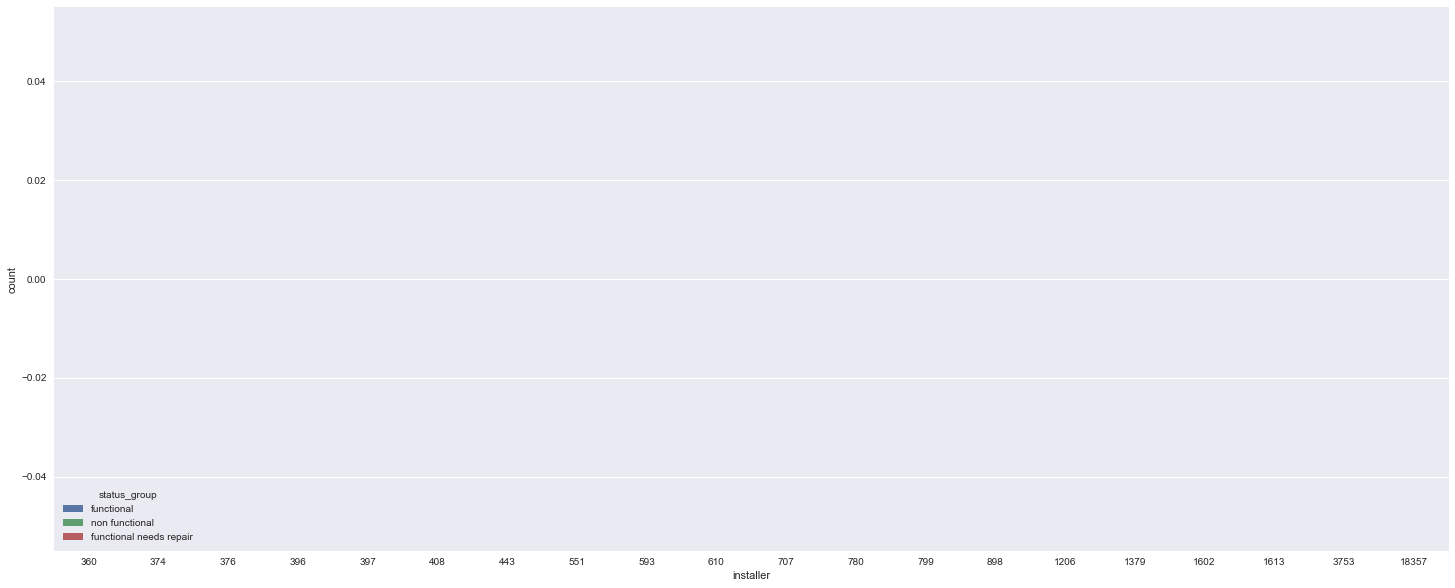

In [90]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x='installer', hue='status_group', data=df)